In [1]:
import pandas as pd
import matplotlib.pyplot as plt

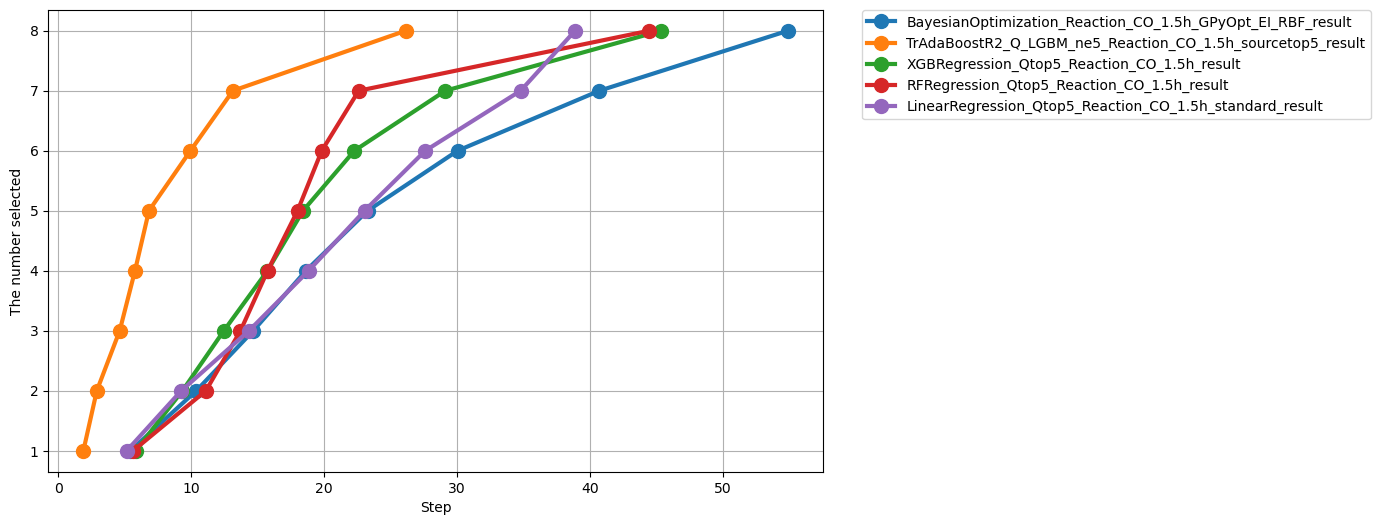

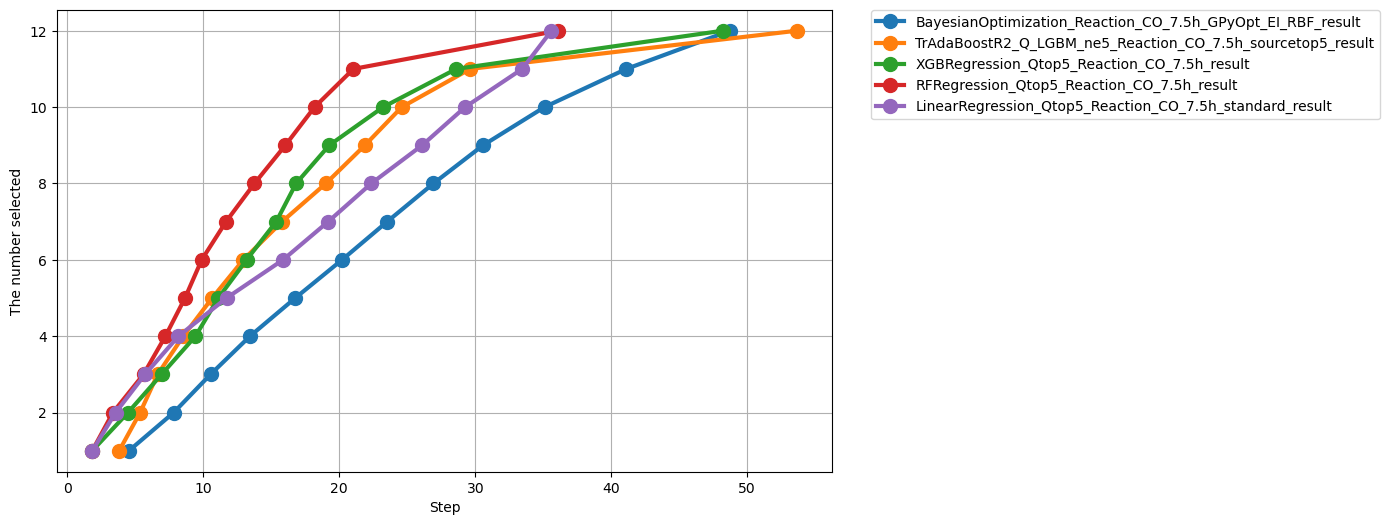

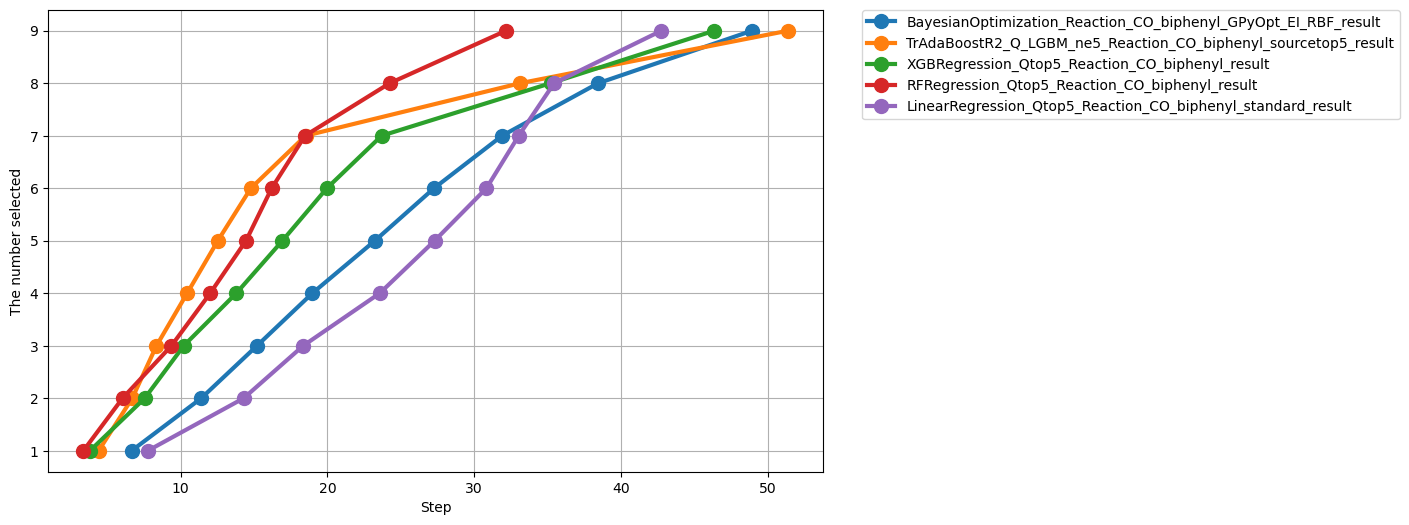

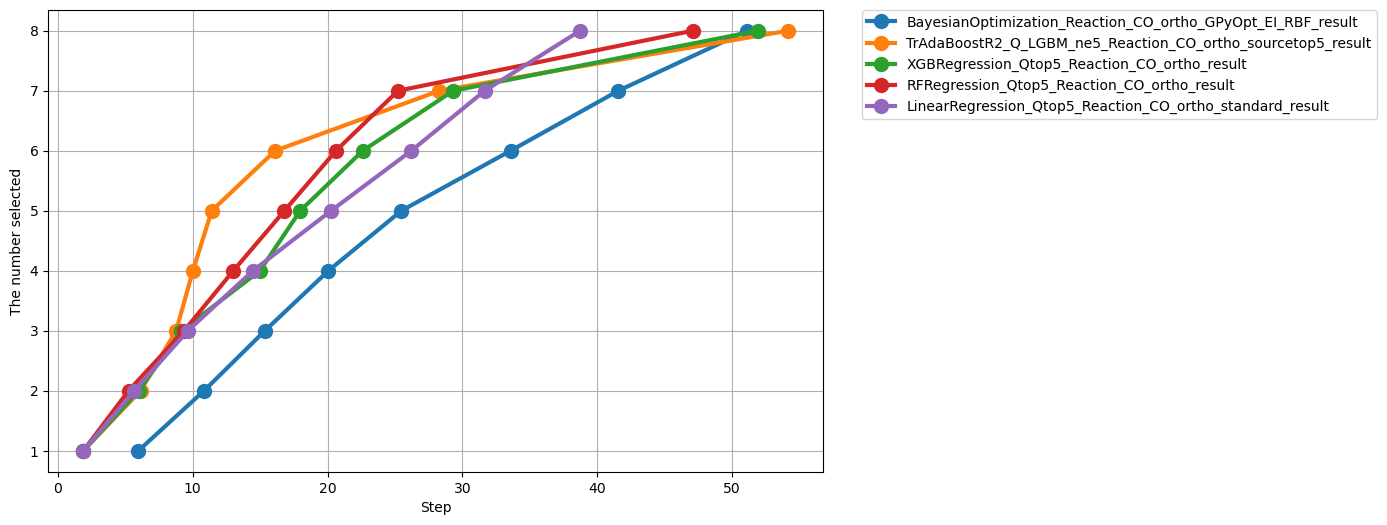

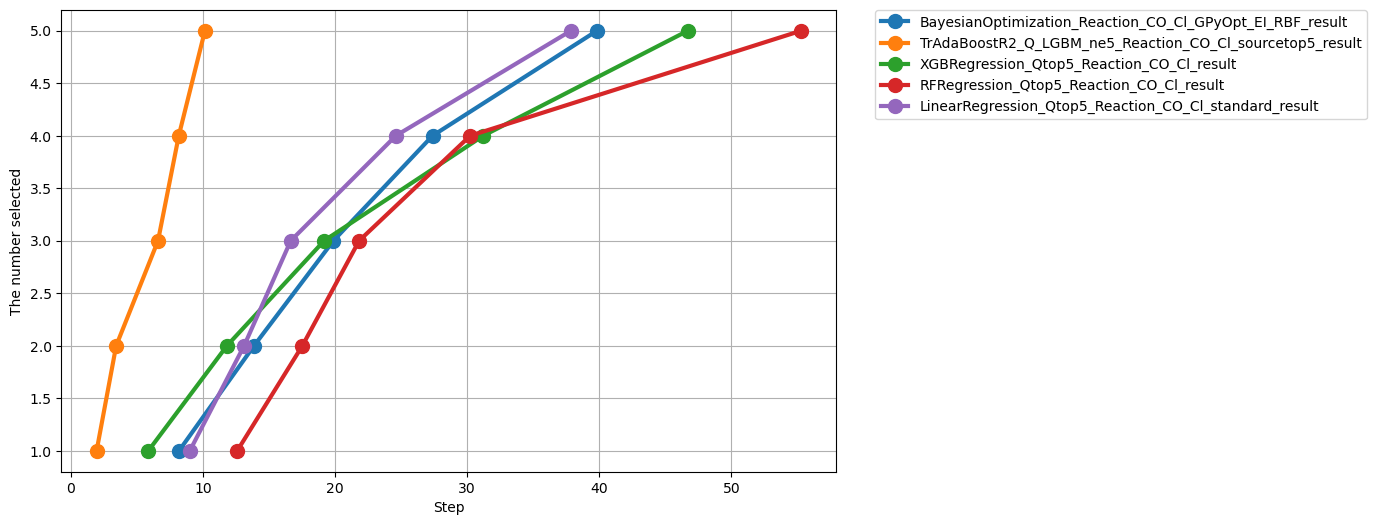

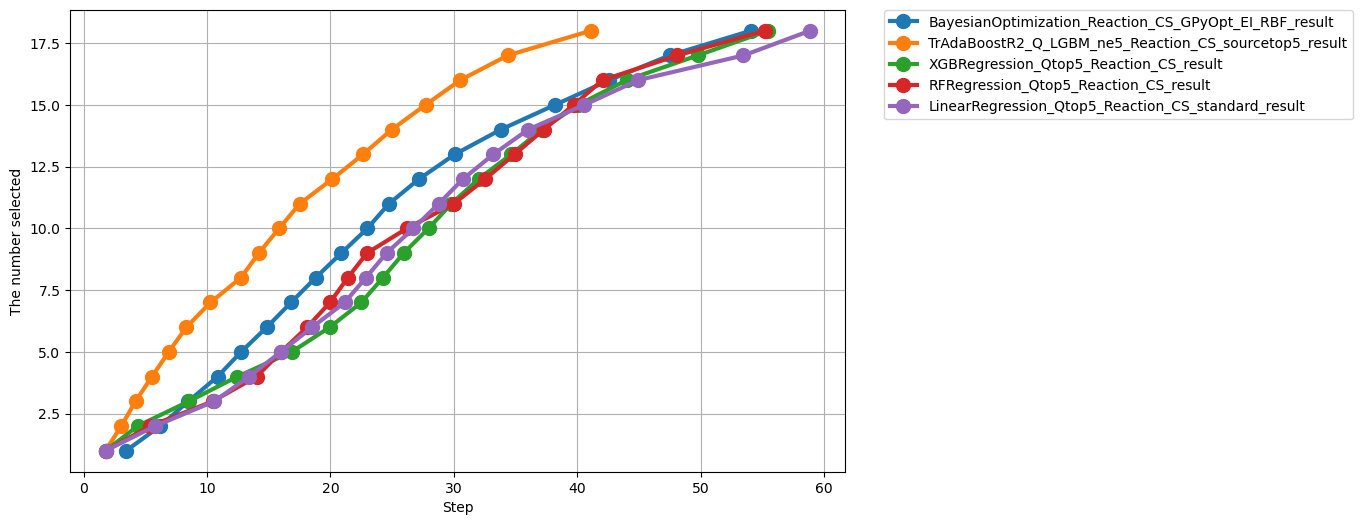

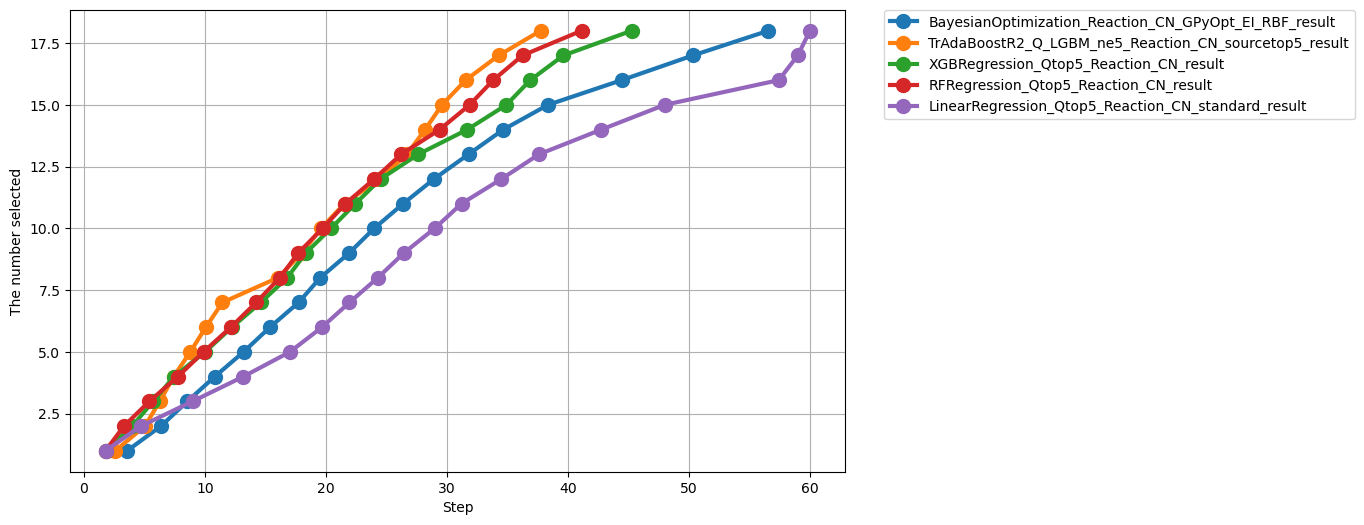

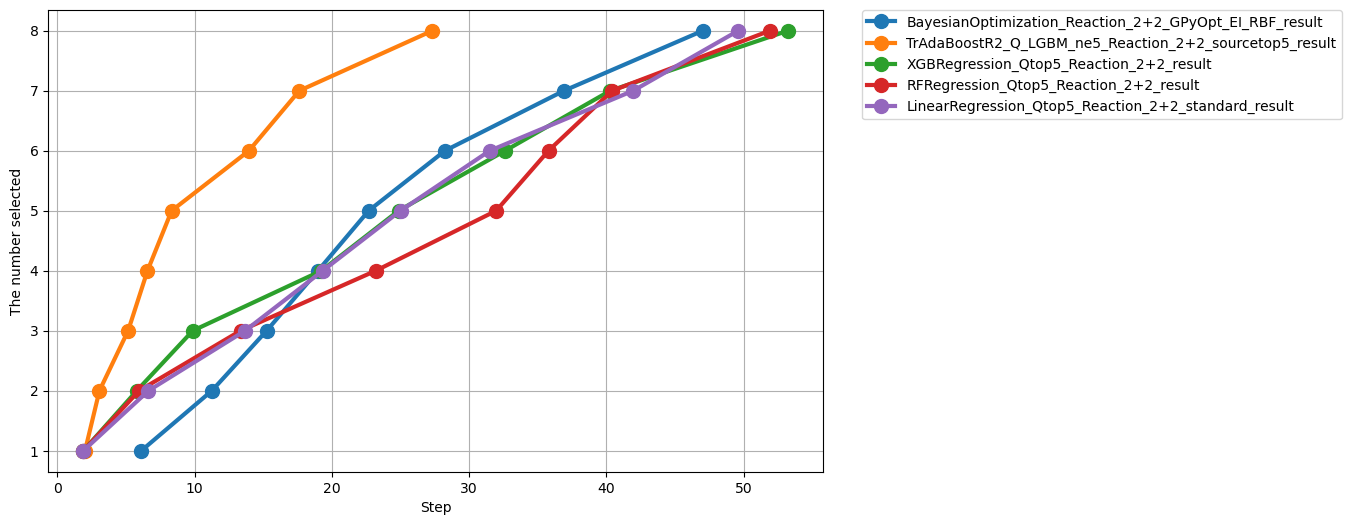

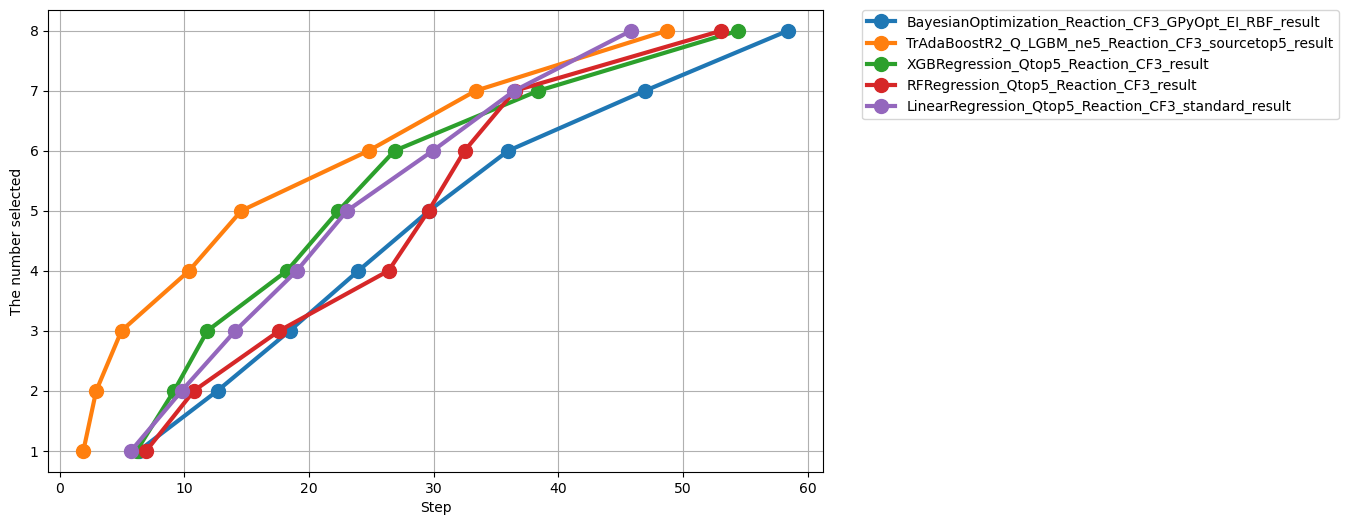

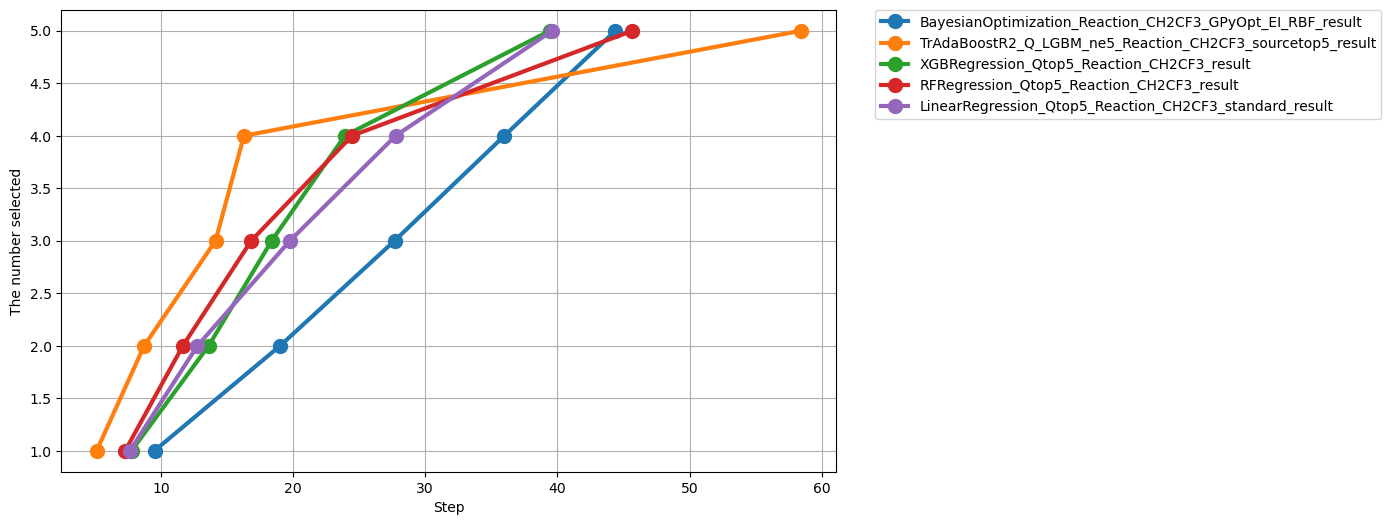

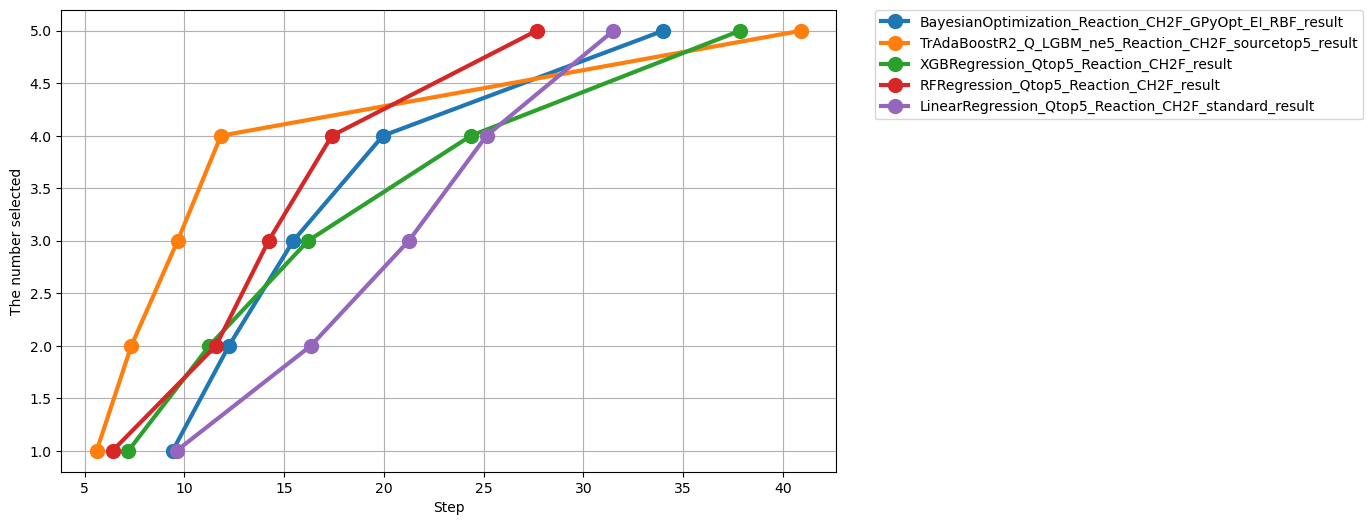

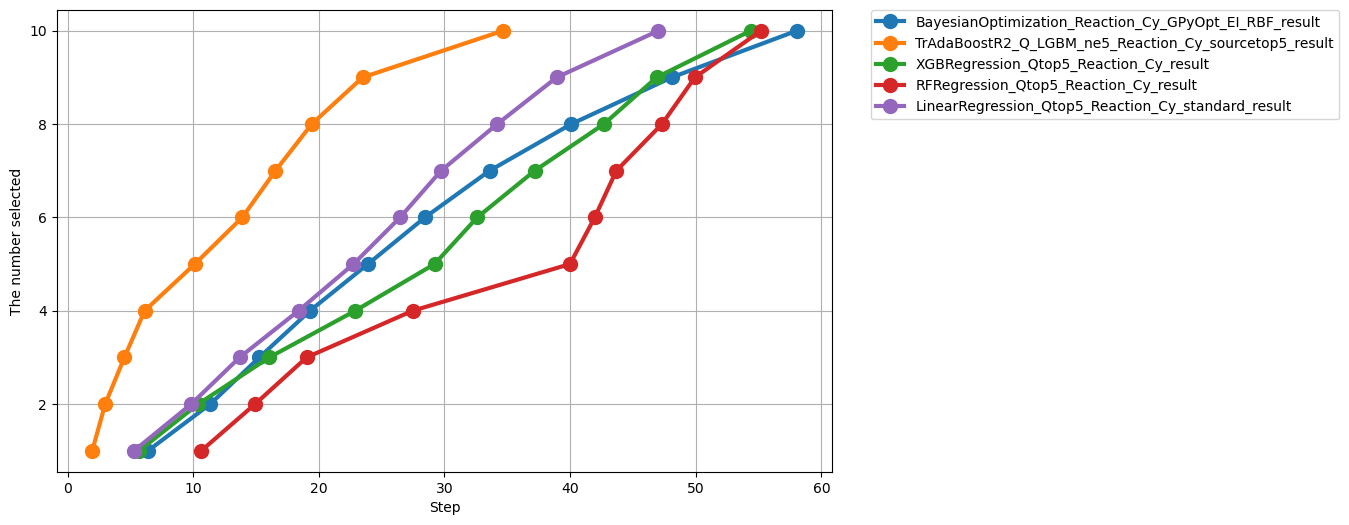

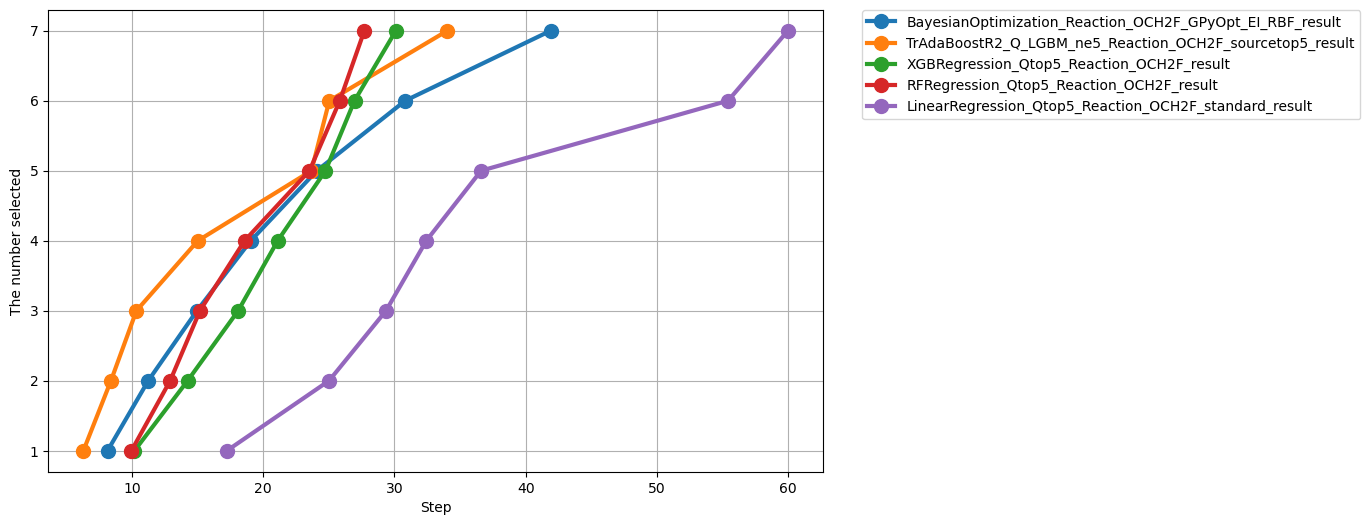

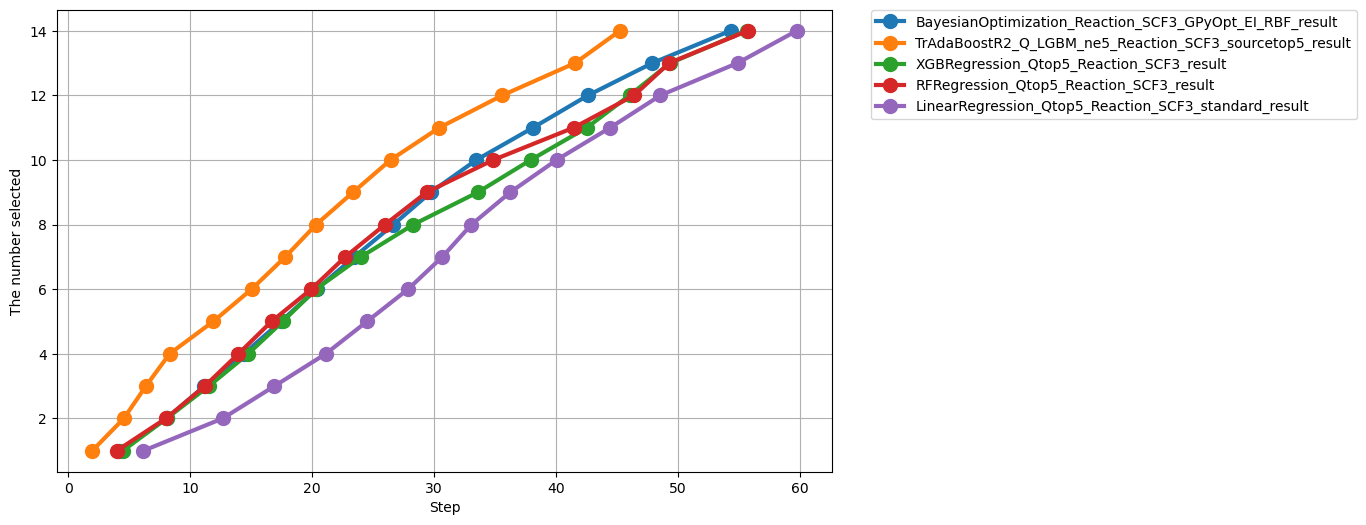

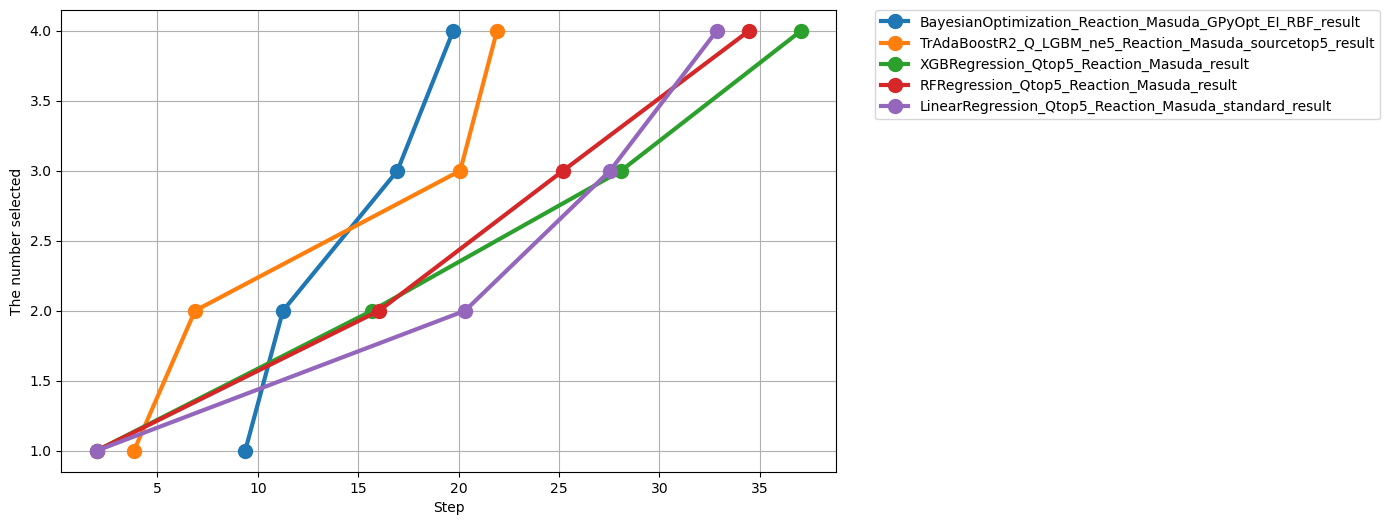

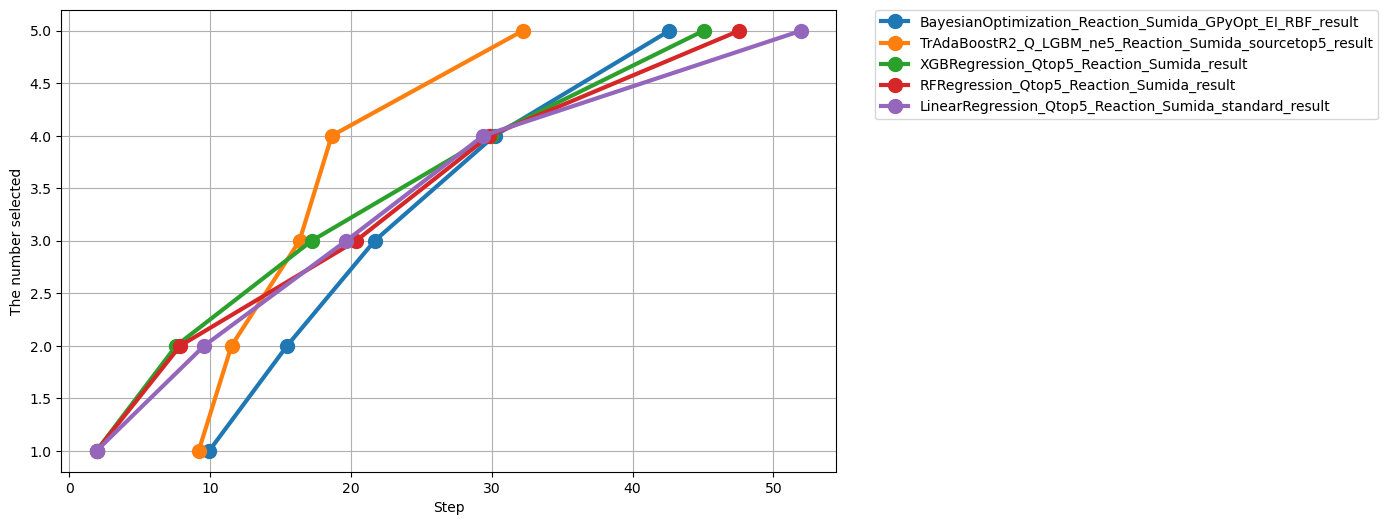

In [2]:
All_data_names = ['Reaction_CO_1.5h', 'Reaction_CO_7.5h', 'Reaction_CO_biphenyl', 'Reaction_CO_ortho', 'Reaction_CO_Cl', 'Reaction_CS', 
                  'Reaction_CN', 'Reaction_2+2', 'Reaction_CF3', 'Reaction_CH2CF3', 'Reaction_CH2F', 'Reaction_Cy', 'Reaction_OCH2F', 'Reaction_SCF3',
                  'Reaction_Masuda', 'Reaction_Sumida']

for target in All_data_names:
    # ファイル名指定
    save_file = f"Qtop5_model_comp_{target}"
    
    # 入力リスト（_select_averages.csvを除いた名前）
    data_names = [
                  f'BayesianOptimization_{target}_GPyOpt_EI_RBF_result',
                  f'TrAdaBoostR2_Q_LGBM_ne5_{target}_sourcetop5_result',
                  #f'TrAdaBoostR2_Qtop3_LGBM_ne5_{target}_sourcetop5_result',
                  #f'TrAdaBoostR2_Qtop1_LGBM_ne5_{target}_sourcetop5_result',
                  #f'TrAdaBoostR2_QAll_LGBM_ne5_{target}_sourcetop5_result',
                  #f'TrAdaBoostR2_Q_ep0.05_LGBM_ne5_{target}_sourcetop5_result',
                  #f'TrAdaBoostR2_Qtop3_ep0.05_LGBM_ne5_{target}_sourcetop5_result',
                  #f'TrAdaBoostR2_Qtop1_ep0.05_LGBM_ne5_{target}_sourcetop5_result',
                  #f'TrAdaBoostR2_QAll_ep0.05_LGBM_ne5_{target}_sourcetop5_result',
                 # f'TrAdaBoostR2_Q_ep0.07_LGBM_ne5_{target}_sourcetop5_result',
                  #f'TrAdaBoostR2_Qtop3_ep0.07_LGBM_ne5_{target}_sourcetop5_result',
                  #f'TrAdaBoostR2_Qtop1_ep0.07_LGBM_ne5_{target}_sourcetop5_result',
                  #f'TrAdaBoostR2_QAll_ep0.07_LGBM_ne5_{target}_sourcetop5_result',       
                  #f'TrAdaBoostR2_Q_ep0.1_LGBM_ne5_{target}_sourcetop5_result',
                  #f'TrAdaBoostR2_Qtop3_ep0.1_LGBM_ne5_{target}_sourcetop5_result',
                  #f'TrAdaBoostR2_Qtop1_ep0.1_LGBM_ne5_{target}_sourcetop5_result',
                  #f'TrAdaBoostR2_QAll_ep0.1_LGBM_ne5_{target}_sourcetop5_result', 
                  f'XGBRegression_Qtop5_{target}_result',
                  #f'XGBRegression_Qtop3_{target}_result',
                  #f'XGBRegression_{target}_result',
                  #f'XGBRegression_Qtop5_ep0.05_{target}_result',
                  #f'XGBRegression_Qtop3_ep0.05_{target}_result',
                  #f'XGBRegression_Qtop5_ep0.07_{target}_result',
                  #f'XGBRegression_Qtop3_ep0.07_{target}_result',
                  #f'XGBRegression_Qtop5_ep0.1_{target}_result',
                  #f'XGBRegression_Qtop3_ep0.1_{target}_result',
                  f'RFRegression_Qtop5_{target}_result',
                  #f'RFRegression_Qtop3_{target}_result',
                  #f'RFRegression_{target}_result',
                  f'LinearRegression_Qtop5_{target}_standard_result',
                  #f'LinearRegression_Qtop3_{target}_standard_result',
                  #f'LinearRegression_{target}_standard_result',
                  ]
                  
    # データを格納する辞書
    data_frames = {}
    
    plt.figure(figsize=(10, 6))
    
    # ファイルを読み込み
    for name in data_names:
        file_path = f"../results/{name}_select_averages.csv"  # 自動でファイル名を作成
        data_frames[name] = pd.read_csv(file_path)
    
    # カラーマップの設定（異なる色を自動で割り当てる）
    colors = plt.cm.tab10(range(len(data_names)))  # Tab10カラーマップから色を取得
    
    # プロットの作成
    for i, (label, df) in enumerate(data_frames.items()):
        y_values = df.index + 1  # x軸の値をインデックスに1を加えたものに設定
        x_values = df[label]  # y軸の値として各データフレーム内の対応する列を指定
        plt.plot(x_values, y_values, marker='o',markersize=10, linewidth=3, color=colors[i], linestyle='-', label=label)
    
    # 凡例と表示
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.ylabel('The number selected')
    plt.xlabel('Step')
    plt.grid()
    
    # 画像ファイルとして保存
    file_name = f"../figures/{save_file}.png"  # 保存するファイル名
    plt.savefig(file_name, dpi=300, bbox_inches='tight')
    
    plt.show()